# Superstore Sales Workflow Tutorial

This notebook walks through cleaning the Superstore dataset, designing a relational structure, creating an SQLite database, and running example SQL queries and visualizations.

In [1]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mticker


## 1️) Load and Inspect the Dataset

In [2]:
# reading error codes + research is how you can learn if there is different encoding, as seen below
df = pd.read_csv('../data/Superstore.csv', encoding='ISO-8859-1')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2013-152156,09-11-2013,12-11-2013,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2013-152156,09-11-2013,12-11-2013,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2013-138688,13-06-2013,17-06-2013,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2012-108966,11-10-2012,18-10-2012,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2012-108966,11-10-2012,18-10-2012,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


### Double check some datatypes, and for nulls and duplicates:

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [4]:
df.duplicated().sum()

np.int64(0)

In [5]:
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

This data is incredibly clean - we can see there are no null values and no duplicates. However, there are some dates that could be saved in a better format.

## 2) Data Cleaning

In [6]:
df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True)
df['Ship Date'] = pd.to_datetime(df['Ship Date'], dayfirst=True)

In [7]:
df.dtypes

Row ID                    int64
Order ID                 object
Order Date       datetime64[ns]
Ship Date        datetime64[ns]
Ship Mode                object
Customer ID              object
Customer Name            object
Segment                  object
Country                  object
City                     object
State                    object
Postal Code               int64
Region                   object
Product ID               object
Category                 object
Sub-Category             object
Product Name             object
Sales                   float64
Quantity                  int64
Discount                float64
Profit                  float64
dtype: object

In [8]:
df.Segment.unique()

array(['Consumer', 'Corporate', 'Home Office'], dtype=object)

In [9]:
df.rename(columns={"Segment":"customer_category"}, inplace=True)
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,customer_category,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2013-152156,2013-11-09,2013-11-12,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2013-152156,2013-11-09,2013-11-12,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2013-138688,2013-06-13,2013-06-17,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2012-108966,2012-10-11,2012-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2012-108966,2012-10-11,2012-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


With real data, it is very likely more cleaning and wrangling would be required. 

## 3) Build Relational Tables

In [12]:
conn = sqlite3.connect('superstore.db')

customers_df = df[['Customer ID','Customer Name','customer_category','City','State','Region']].drop_duplicates().rename(columns={
    'Customer ID':'customer_id',
    'Customer Name':'customer_name',
    'City':'city',
    'State':'state',
    'Region':'region'
})

products_df = df[['Product ID','Category','Sub-Category','Product Name']].drop_duplicates().rename(columns={
    'Product ID':'product_id',
    'Category':'category',
    'Sub-Category':'subcategory',
    'Product Name':'product_name'
})

orders_df = df[['Order ID','Order Date','Ship Date','Ship Mode','Customer ID']].drop_duplicates().rename(columns={
    'Order ID':'order_id',
    'Order Date':'order_date',
    'Ship Date':'ship_date',
    'Ship Mode':'ship_mode',
    'Customer ID':'customer_id'
})

order_details_df = df[['Order ID','Product ID','Sales','Quantity','Discount','Profit']].rename(columns={
    'Order ID':'order_id',
    'Product ID':'product_id'
})

customers_df.to_sql('customers', conn, index=False, if_exists='replace')
products_df.to_sql('products', conn, index=False, if_exists='replace')
orders_df.to_sql('orders', conn, index=False, if_exists='replace')
order_details_df.to_sql('order_details', conn, index=False, if_exists='replace')
conn.commit()

## 4) Make Some Queries!

### Which customer segments bring in the most revenue and profit?

In [13]:
query1 = """ SELECT 
    c.customer_category,
    ROUND(SUM(od.sales), 2) AS total_sales,
    ROUND(SUM(od.profit), 2) AS total_profit
FROM order_details od
JOIN orders o ON od.order_id = o.order_id
JOIN customers c ON o.customer_id = c.customer_id
GROUP BY c.customer_category
ORDER BY total_sales DESC;
"""
result1 = pd.read_sql(query1, conn)
result1

,customer_category,total_sales,total_profit
0,Consumer,7954360.98,923657.52
1,Corporate,4768494.07,622614.73
2,Home Office,2808676.56,403920.45


### What are the top 10 customers by total sales?

In [18]:
query2 = """
SELECT
    c.customer_id,
    c.customer_name,
    SUM(od.sales) AS total_sales
FROM customers c
JOIN orders o ON c.customer_id = o.customer_id
JOIN order_details od ON o.order_id = od.order_id
GROUP BY c.customer_id, c.customer_name 
ORDER BY total_sales DESC
LIMIT 10;
"""
result2 = pd.read_sql(query2, conn)
result2

,customer_id,customer_name,total_sales
0,KL-16645,Ken Lonsdale,141752.290
1,SE-20110,Sanjit Engle,134303.818
2,AB-10105,Adrian Barton,130262.139
3,SM-20320,Sean Miller,125215.250
4,CL-12565,Clay Ludtke,119686.006
5,SC-20095,Sanjit Chand,113138.672
6,SV-20365,Seth Vernon,103238.550
7,ZC-21910,Zuschuss Carroll,96308.484
8,ME-17320,Maria Etezadi,95973.552
9,LA-16780,Laura Armstrong,95405.442


### Which product categories and subcategories are the most profitable overall?

In [20]:
query3 = """ 
SELECT
    p.category,
    p.subcategory,
    SUM(od.profit) AS total_profit
FROM products p
JOIN order_details od ON p.product_id = od.product_id
GROUP BY p.category, p.subcategory
ORDER BY total_profit DESC;
"""
result3 = pd.read_sql(query3, conn)
result3

,category,subcategory,total_profit
0,Technology,Copiers,55617.8249
1,Technology,Accessories,48359.0527
2,Technology,Phones,46936.1861
3,Office Supplies,Paper,36994.5335
4,Office Supplies,Binders,30373.2020
5,Furniture,Chairs,26707.6526
6,Office Supplies,Storage,21408.7032
7,Office Supplies,Appliances,18514.4928
8,Furniture,Furnishings,14569.5873
9,Office Supplies,Envelopes,6964.1767


### What is the average discount given per category?

In [21]:
query4 = """
SELECT
    p.category,
    AVG(od.discount) AS avg_discount
FROM products p
JOIN order_details od ON p.product_id = od.product_id
GROUP BY p.category
ORDER BY avg_discount DESC;
"""
result4 = pd.read_sql(query4, conn)
result4

,category,avg_discount
0,Furniture,0.172514
1,Office Supplies,0.157000
2,Technology,0.132970


### Which states or regions contribute the most to total sales?

In [26]:
query5s = """
SELECT
    c.state,
    SUM(od.sales) AS total_sales
FROM customers c
JOIN orders o ON c.customer_id = o.customer_id
JOIN order_details od ON o.order_id = od.order_id
GROUP BY c.state
ORDER BY total_sales DESC;
"""
result5s = pd.read_sql(query5s, conn)
result5s

,state,total_sales
0,California,2.991944e+06
1,New York,1.572500e+06
2,Texas,1.495331e+06
3,Pennsylvania,8.142799e+05
4,Illinois,7.977212e+05
5,Washington,7.839997e+05
6,Ohio,7.077477e+05
7,Florida,6.356378e+05
8,North Carolina,4.379384e+05
9,Michigan,4.324280e+05


In [27]:
query5r = """
SELECT
    c.region,
    SUM(od.sales) AS total_sales
FROM customers c
JOIN orders o ON c.customer_id = o.customer_id
JOIN order_details od ON o.order_id = od.order_id
GROUP BY c.region
ORDER BY total_sales DESC;
"""
result5r = pd.read_sql(query5r, conn)
result5r

,region,total_sales
0,West,4.905329e+06
1,East,4.164299e+06
2,Central,3.755466e+06
3,South,2.706438e+06


### How many orders were shipped late (where Ship Date > Order Date + 3 days)?

In [29]:
query6 = """
SELECT
    COUNT(*) AS late_orders_count
FROM orders
WHERE julianday(ship_date) > julianday(order_date) + 3;
"""
result6 = pd.read_sql(query6, conn)
result6

,late_orders_count
0,3391


### Which month or year had the highest total sales?

In [34]:
query7year = """
SELECT
    strftime('%Y', o.order_date) AS year,
    SUM(od.sales) AS total_sales
FROM orders o
JOIN order_details od ON o.order_id = od.order_id
GROUP BY year
ORDER BY total_sales DESC;
"""
result7year = pd.read_sql(query7year, conn)
result7year

,year,total_sales
0,2014,733947.0232
1,2013,608473.8300
2,2011,484247.4981
3,2012,470532.5090


In [72]:
query7month = """
SELECT
    strftime('%m', o.order_date) AS month,
    SUM(od.sales) AS total_sales
FROM orders o
JOIN order_details od ON o.order_id = od.order_id
GROUP BY month
ORDER BY month ASC;
"""
result7month = pd.read_sql(query7month, conn)
result7month

,month,total_sales
0,01,95365.9376
1,02,60172.6494
2,03,199252.9840
3,04,141851.5674
4,05,156122.2867
5,06,147082.6113
6,07,149580.8380
7,08,159589.4510
8,09,309770.0997
9,10,197115.2017


### What are the most frequently ordered products?

In [38]:
query8 = """
SELECT
    p.product_name,
    COUNT(od.order_id) AS order_count,
    SUM(od.quantity) AS frequently_ordered_products
FROM order_details od
JOIN products p ON od.product_id = p.product_id
GROUP BY p.product_name
ORDER BY frequently_ordered_products DESC
LIMIT 10;
"""
result8 = pd.read_sql(query8, conn)
result8

,product_name,order_count,frequently_ordered_products
0,Staples,227,876
1,Logitech P710e Mobile Speakerphone,18,75
2,Imation 16GB Mini TravelDrive USB 2.0 Flash Drive,18,75
3,KI Adjustable-Height Table,18,74
4,Storex Dura Pro Binders,17,71
5,Avery Non-Stick Binders,20,71
6,Xerox 1908,19,70
7,Xerox 1881,19,70
8,GBC Premium Transparent Covers with Diagonal L...,14,67
9,"Situations Contoured Folding Chairs, 4/Set",15,64


### Which customers placed more than 5 orders total?

In [40]:
query9 = """
SELECT
    c.customer_id,
    c.customer_name,
    COUNT(o.order_id) AS total_orders
FROM customers c
JOIN orders o ON c.customer_id = o.customer_id
GROUP BY c.customer_id, c.customer_name
HAVING COUNT(o.order_id) > 5
ORDER BY total_orders DESC;
"""
result9 = pd.read_sql(query9, conn)
result9

,customer_id,customer_name,total_orders
0,EP-13915,Emily Phan,255
1,JE-15745,Joel Eaton,169
2,EA-14035,Erin Ashbrook,156
3,NS-18640,Noel Staavos,156
4,ZC-21910,Zuschuss Carroll,156
...,...,...,...
742,SW-20350,Sean Wendt,9
743,TM-21490,Tony Molinari,9
744,TT-21265,Tim Taslimi,9
745,VP-21730,Victor Preis,9


### What’s the profit margin (profit ÷ sales) by category or segment?

In [42]:
query10 = """
SELECT
    c.customer_category AS segment,
    ROUND(SUM(od.profit) / SUM(od.sales), 3) AS profit_margin
From customers c
JOIN orders o ON c.customer_id = o.customer_id
JOIN order_details od ON o.order_id = od.order_id
GROUP BY c.customer_category
ORDER BY profit_margin DESC;
"""
result10 = pd.read_sql(query10, conn)
result10

,segment,profit_margin
0,Home Office,0.144
1,Corporate,0.131
2,Consumer,0.116


### 5) Visualize it!

From your ten results, select at least 4 to utilize in a meaningful visualization. 

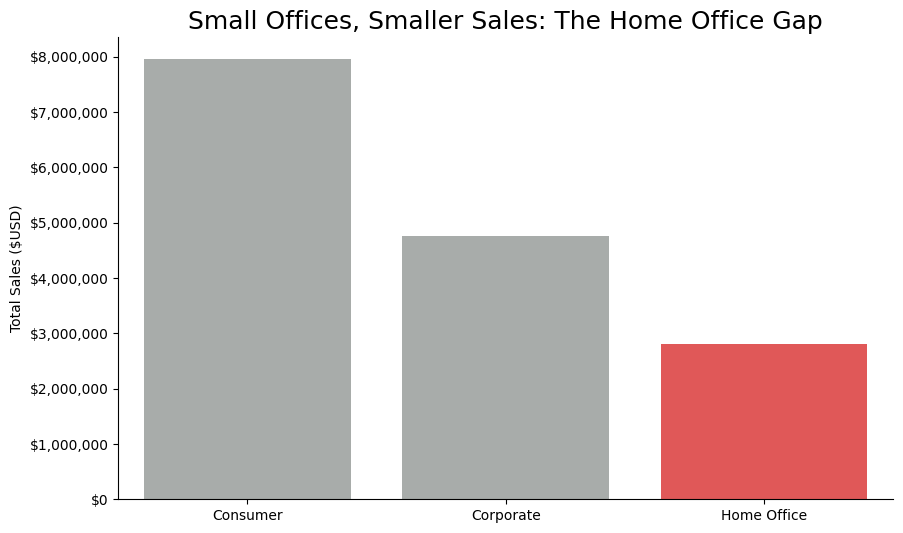

In [22]:
# example using result1
plt.figure(figsize=(10,6))
colors = ["#a7adaa", "#a7adaa", "#f74141" ]
sns.barplot(result1, x='customer_category', y='total_sales', palette=colors, hue='customer_category', legend=False)
plt.title('Small Offices, Smaller Sales: The Home Office Gap',fontsize=18)
plt.xlabel(None)
plt.ylabel('Total Sales ($USD)')

#for those wondering how to get rid of scientific notation! Set style to plain:
plt.ticklabel_format(style='plain', axis='y')

#mticker is a great library for helping tick mark formatting, such as adding commas and dollar signs in this case
ax = plt.gca()
ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'${x:,.0f}'))

#using the seaborn library, despining is way easier!
sns.despine()
plt.show()


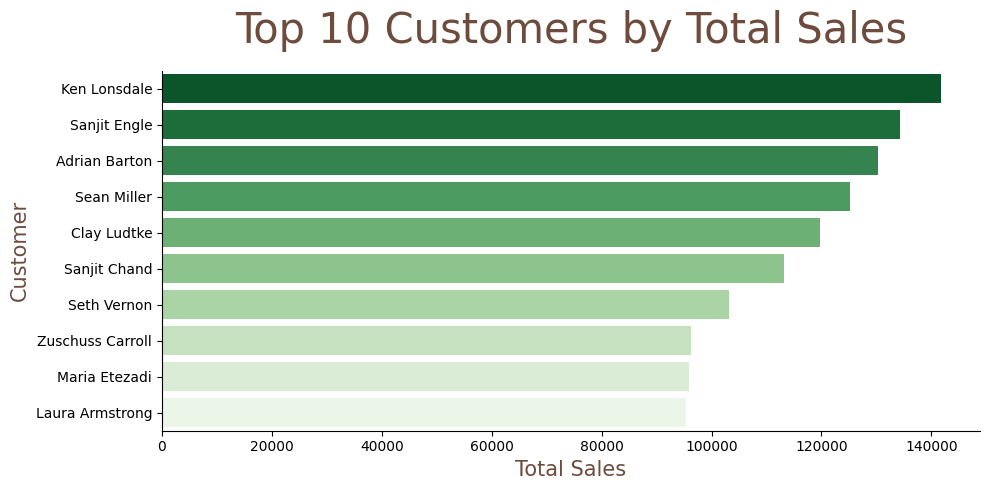

In [77]:
# visualization one code here
plt.figure(figsize=(10,5))
sns.barplot(y="customer_name", x="total_sales", data=result2, palette="Greens_r", hue="customer_name", legend=False)
plt.title("Top 10 Customers by Total Sales", color="#6D4C3D", fontsize=30, ha='center', pad=20)
plt.xlabel("Total Sales", color="#6D4C3D", fontsize=15)
plt.ylabel("Customer", color="#6D4C3D", fontsize=15)

#remove spines
ax = plt.gca()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.tight_layout()
plt.show()

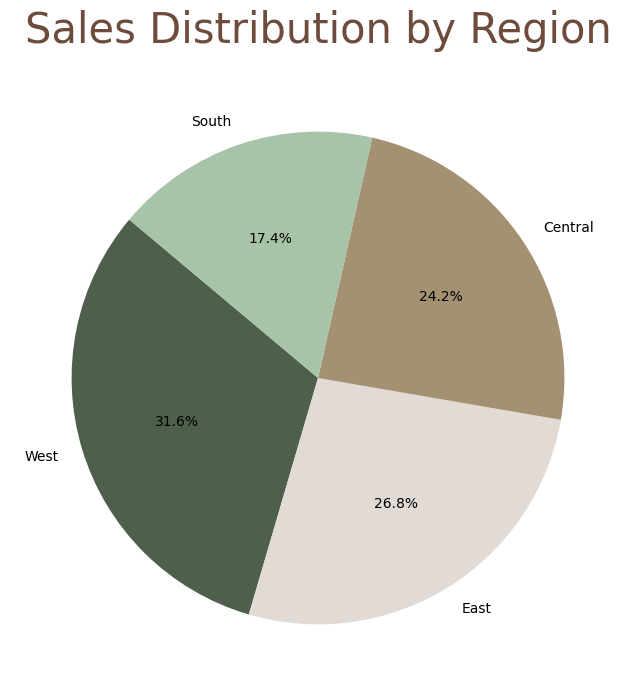

In [70]:
# visualization two code here
plt.figure(figsize=(8,8))
plt.pie(
    result5r['total_sales'], 
    labels=result5r['region'],
    autopct='%1.1f%%', 
    startangle=140,
    colors=["#4E604B", "#E2DBD5", "#A39171", "#A8C4A8"]
)
plt.title("Sales Distribution by Region", color="#6D4C3D", fontsize=30, pad=20)

plt.show()


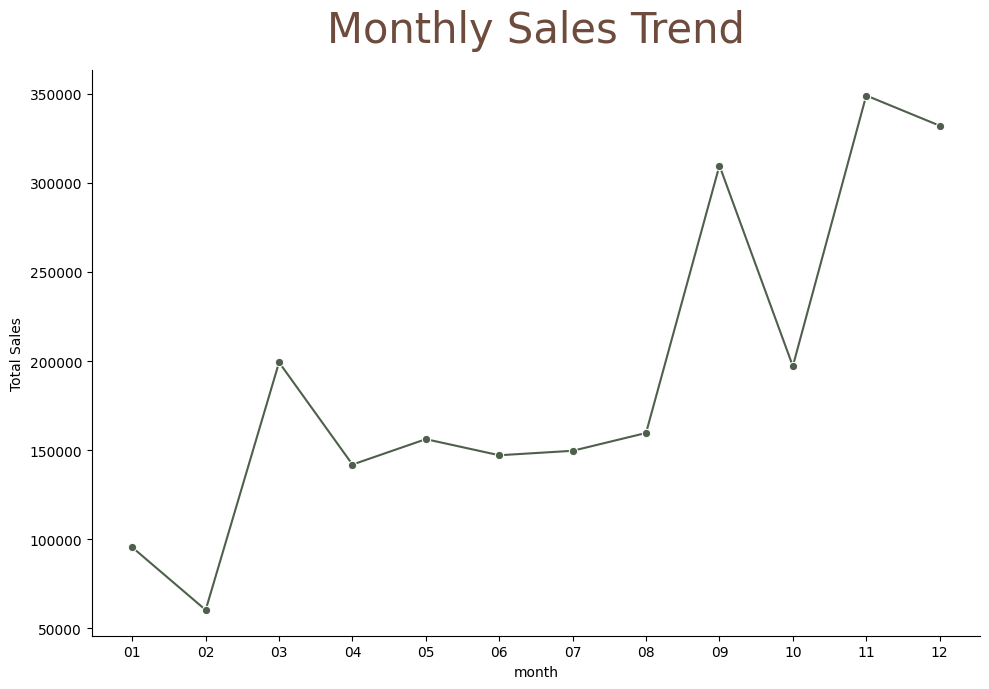

In [76]:
# visualization three code here
plt.figure(figsize=(10,7))
sns.lineplot(x='month', y='total_sales', data=result7month, marker='o', color="#4E604B")
plt.title('Monthly Sales Trend', color="#6D4C3D", fontsize=30, pad=20)
plt.ylabel('Total Sales')

ax = plt.gca()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.tight_layout()
plt.show()

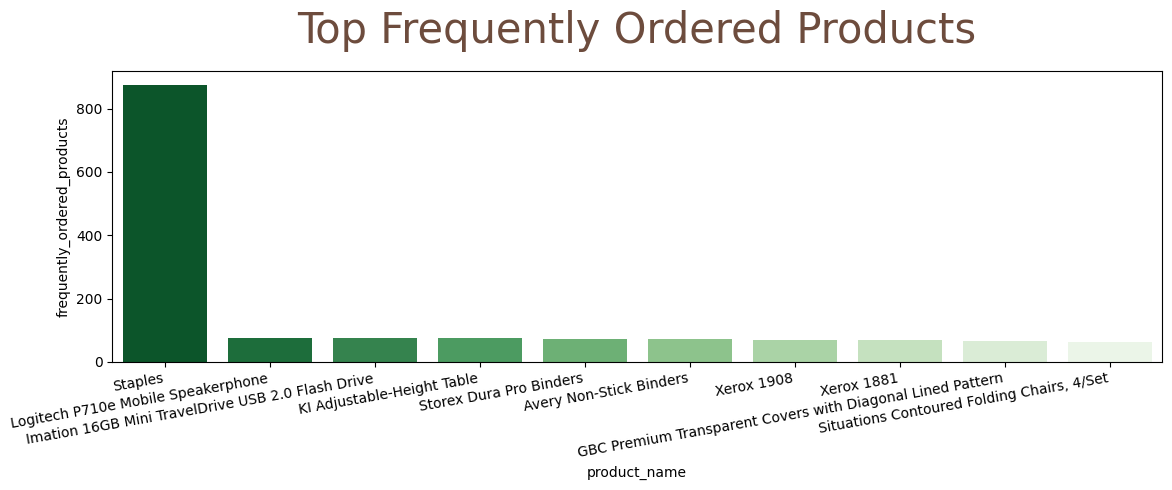

In [84]:
# visualization four code here
plt.figure(figsize=(12,5))
sns.barplot(
    x='product_name', 
    y='frequently_ordered_products', 
    data=result8, 
    palette="Greens_r", 
    hue="product_name", 
    legend=False
)
plt.xticks(rotation=10, ha='right')
plt.title('Top Frequently Ordered Products', color="#6D4C3D", fontsize=30, pad=20)

plt.tight_layout()
plt.show()
